In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import sys

In [4]:
sampcon_dir = Path(Path.home(), "mtorc2/exp_9/83/analysis/820094/sampcon_1/887112")
clust_0_file = Path(sampcon_dir, "cluster.0/xls.csv")
clust_0_df = pd.read_csv(clust_0_file)

clust_1_file = Path(sampcon_dir, "cluster.1/xls.csv")
clust_1_df = pd.read_csv(clust_1_file)


In [5]:
clust_0_df.head()

,Unnamed: 0,prot1,res1,prot2,res2,sat,ambig,frame
0,0,MTOR,1197,RICTOR,516,1,0,3676
1,1,MTOR,1218,RICTOR,516,1,0,3676
2,2,RICTOR,1642,MSIN1,102,1,0,3676
3,3,MTOR,1993,RICTOR,1092,1,0,225
4,4,RICTOR,1642,MSIN1,104,1,0,3676


In [6]:
clust_1_df.head()

,Unnamed: 0,prot1,res1,prot2,res2,sat,ambig,frame
0,0,MTOR,1197,RICTOR,516,1,0,61
1,1,MTOR,1218,RICTOR,516,1,0,61
2,2,RICTOR,1642,MSIN1,102,1,0,61
3,3,MTOR,1993,RICTOR,1092,0,0,-1
4,4,RICTOR,1642,MSIN1,104,1,0,61


In [ ]:
chain_ids = dict()
chain_ids["MTOR"] = "A"
chain_ids["RICTOR"] = "B"
chain_ids["MLST8"] = "C"
chain_ids["MSIN1"] = "D"
chain_ids["CRIM"] = "E"
chain_ids["RBD"] = "F"
chain_ids["MSIN1PH"] = "G"
chain_ids["AKT1PH"] = "H"
chain_ids["KINASE"] = "I"

In [15]:
xor = np.logical_xor(clust_0_df["sat"],clust_1_df["sat"])
for i in xor[xor == True].index:
    print(clust_0_df.iloc[i,1:5])
    if clust_0_df.iloc[i, clust_0_df.columns.get_loc("sat")]: 
        print(0)
    else: 
        print(1)

prot1      MTOR
res1       1993
prot2    RICTOR
res2       1092
Name: 3, dtype: object
0
prot1    MSIN1PH
res1          41
prot2      MLST8
res2         215
Name: 9, dtype: object
0
prot1      MTOR
res1        533
prot2    KINASE
res2         44
Name: 14, dtype: object
0
prot1    KINASE
res1         37
prot2    RICTOR
res2        516
Name: 17, dtype: object
0
prot1    RICTOR
res1        719
prot2    KINASE
res2         18
Name: 18, dtype: object
0
prot1    RICTOR
res1        813
prot2    KINASE
res2         18
Name: 25, dtype: object
0
prot1       RBD
res1         38
prot2    RICTOR
res2       1095
Name: 28, dtype: object
0
prot1      MTOR
res1       2090
prot2    KINASE
res2         44
Name: 32, dtype: object
0
prot1    KINASE
res1        131
prot2    RICTOR
res2        800
Name: 33, dtype: object
0
prot1       MTOR
res1        1457
prot2    MSIN1PH
res2          41
Name: 41, dtype: object
0


In [ ]:
chain_ids = dict()
chain_ids["MTOR"] = "A"
chain_ids["RICTOR"] = "B"
chain_ids["MLST8"] = "C"
chain_ids["MSIN1"] = "D"
chain_ids["CRIM"] = "E"
chain_ids["RBD"] = "F"
chain_ids["MSIN1PH"] = "G"
chain_ids["AKT1PH"] = "H"
chain_ids["KINASE"] = "I"

sat_xls, unsat_xls = "", ""

# fh = RMF.open_rmf_file_read_only(str(rmf_file))
# m = IMP.Model()
# h = IMP.rmf.create_hierarchies(fh, m)[0]

xor = np.logical_xor(clust_0_df["sat"],clust_1_df["sat"])
for i in xor[xor == True].index:
    prot1, res1, prot2, res2, xl_sat, ambig = xl_df.iloc[i,1:7]
    print(prot1, res1, prot2, res2, xl_sat, ambig)

    sel1 = IMP.atom.Selection(h, molecule=prot1, residue_index=int(res1))
    pid1 = sel1.get_selected_particle_indexes()[0]
    if "bead" in m.get_particle_name(pid1):
        res1 = get_res_id_10(m, pid1)

    sel2 = IMP.atom.Selection(h, molecule=prot2, residue_index=int(res2))
    pid2 = sel2.get_selected_particle_indexes()[0]
    if "bead" in m.get_particle_name(pid2):
        res2 = get_res_id_10(m, pid2)

    chain_1 = chain_ids[prot1]
    if ambig:
        chain_2 = chr(ord(chain_ids[prot2]) + 9)
    else:
        chain_2 = chain_ids[prot2]

    entry = "#1/{}:{} #1/{}:{}\n".format(chain_1, res1, chain_2, res2)
    print(entry)
    if prot1 == prot2 and res1 == res2:
        continue

    if xl_sat:
        sat_xls = sat_xls + entry
    else:
        unsat_xls = unsat_xls + entry

print("; halfbond = false\n; color = green\n; radius = 1\n; dashes = 0\n")
(sat_xls)
if unsat_xls != "":
    f.write("; halfbond = false\n; color = red\n; radius = 1\n; dashes = 0\n")
    f.write(unsat_xls)

# f = open(pb_file, "w")
# f.write("; halfbond = false\n; color = green\n; radius = 1\n; dashes = 0\n")
# f.write(sat_xls)
# if unsat_xls != "":
#     f.write("; halfbond = false\n; color = red\n; radius = 1\n; dashes = 0\n")
#     f.write(unsat_xls)
# f.close()



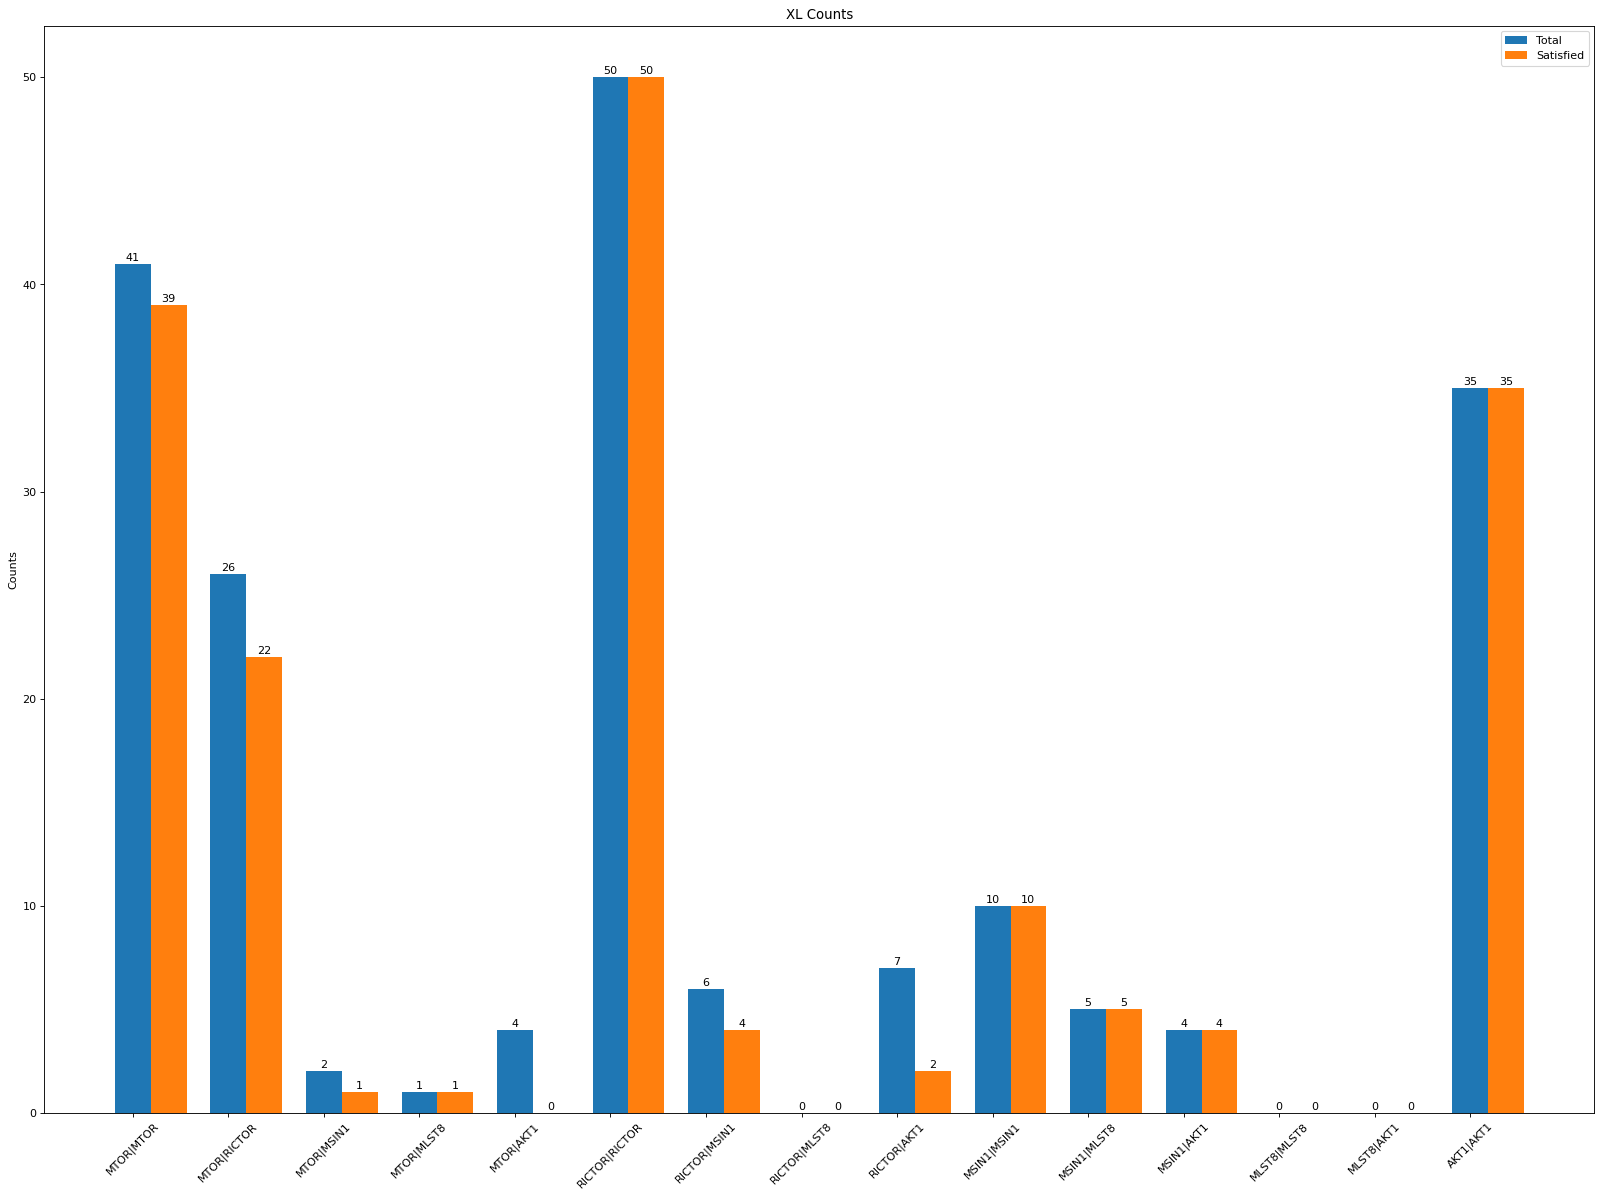

In [35]:
xl_df_file =  Path(Path.home(), "mtorc2/exp_9/84/analysis/998136/sampcon_0/1001786/cluster.0/xls.csv")
xl_df = pd.read_csv(xl_df_file)

n_satisfied = dict() 
n_xls = dict() 

prots = ["MTOR", "RICTOR", "MSIN1", "MLST8", "AKT1"]
for prot in prots: 
    for prot2 in prots: 
        entry = prot + "|" + prot2
        if prot2 + "|" + prot not in n_satisfied.keys(): 
            n_satisfied[entry] = 0
            n_xls[entry] = 0

for i in range(len(xl_df)): 
    prot1 = xl_df.iloc[i, xl_df.columns.get_loc('prot1')]
    prot2 = xl_df.iloc[i, xl_df.columns.get_loc('prot2')]
    
    if prot1 == "CRIM" or prot1 == "RBD" or prot1 == "MSIN1PH": 
        prot1 = "MSIN1"
    if prot2 == "CRIM" or prot2 == "RBD" or prot2 == "MSIN1PH": 
        prot2 = "MSIN1"
        
    if prot1 == "KINASE" or prot1 == "AKT1PH": 
        prot1 = "AKT1"
    if prot2 == "KINASE" or prot2 == "AKT1PH": 
        prot2 = "AKT1"
    
    entry = prot1 + "|" + prot2
    if entry not in n_satisfied.keys(): 
        entry = prot2 + "|" + prot1

    n_xls[entry] = n_xls[entry] + 1
        
    if xl_df.iloc[i, xl_df.columns.get_loc('sat')]:
        n_satisfied[entry] = n_satisfied[entry] + 1 
        
fig, ax = plt.subplots(figsize=(25, 18), dpi=80) 
labels = list(n_satisfied.keys())
contains_list = [n_satisfied[key] for key in n_satisfied.keys()]
satisfied_list = [n_satisfied[key] for key in n_satisfied.keys()]
n_xls_list = [n_xls[key] for key in n_satisfied.keys()]

x = np.arange(len(labels))  # the label locations
width = .75  # the width of the bars

rects3 = ax.bar(x, n_xls_list, width/2, label='Total')
rects2 = ax.bar(x + width/2, satisfied_list, width/2, label='Satisfied')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('XL Counts')
ax.set_xticks(x, labels)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

ax.bar_label(rects2, padding=1)
ax.bar_label(rects3, padding=1)

plt.show()

